In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
top500cities = pd.read_csv('data\GGMCF_top500cities.txt', sep='\t')
top500cities_percap = pd.read_csv('data\GGMCF_top500citiesPercap.txt', sep='\t')

iea = pd.read_excel('data\IEA.xlsx')

owid = pd.read_csv('data\owid-co2-data.csv')

## OWID

In [3]:
owid.columns

owidPerProd = ["cement_co2", "coal_co2", "flaring_co2", "land_use_change_co2", "oil_co2", "other_industry_co2"]

<Axes: xlabel='year'>

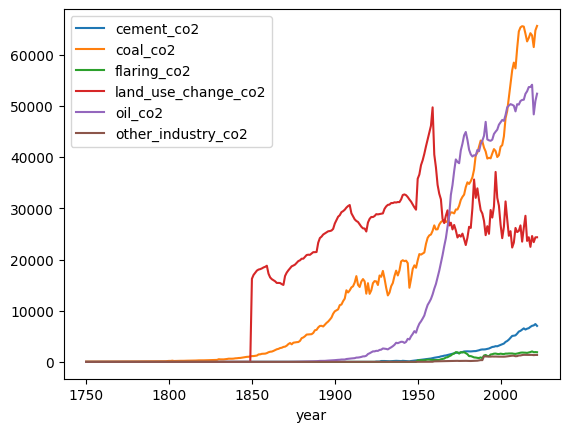

In [4]:
owid.groupby('year').sum()[owidPerProd].plot()

Text(0.5, 1.0, 'CO2 emissions by source')

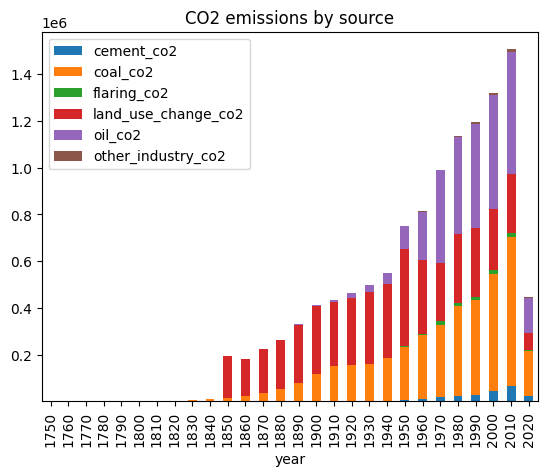

In [166]:
df = owid.groupby('year').sum()[owidPerProd]
#make group of 10 years
df = df.groupby(df.index // 10 * 10).sum()

#plot in stakced bar chart
df.plot(kind='bar', stacked=True)

plt.title('CO2 emissions by source')

Text(0.5, 1.0, 'Global CO2 Emission by Source')

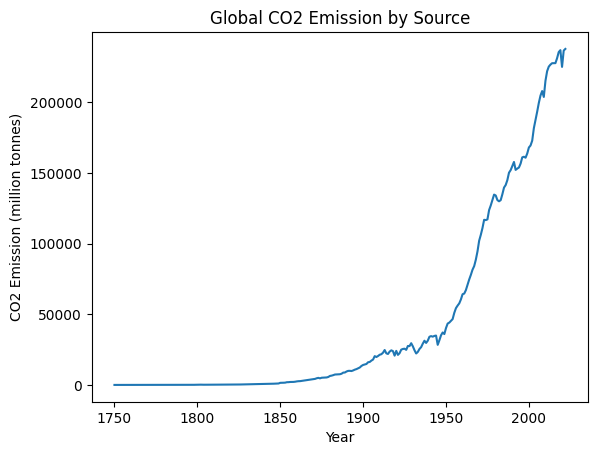

In [165]:
owid.groupby('year').sum()['co2'].plot()

plt.xlabel('Year')
plt.ylabel('CO2 Emission (million tonnes)')

plt.title('Global CO2 Emission by Source')

Text(0.5, 1.0, 'Temperature Change from CO2 Emission in Selected Countries')

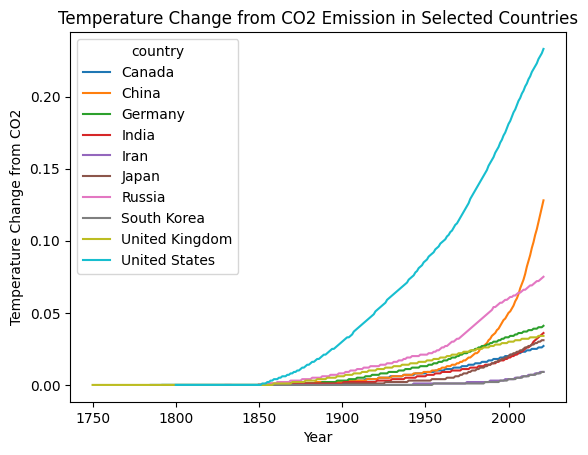

In [164]:
#randomly select some contries
countries = ['United States', 'China', 'India', 'Russia', 'Japan', 'Germany', 'Canada', 'United Kingdom', 'South Korea', 'Iran']

owid[owid['country'].isin(countries)].groupby(['year', 'country']).sum()['temperature_change_from_co2'][:-10].unstack().plot()
#name the axis
plt.xlabel('Year')
plt.ylabel('Temperature Change from CO2')

plt.title('Temperature Change from CO2 Emission in Selected Countries')

Text(0.5, 1.0, 'Population of China over the years')

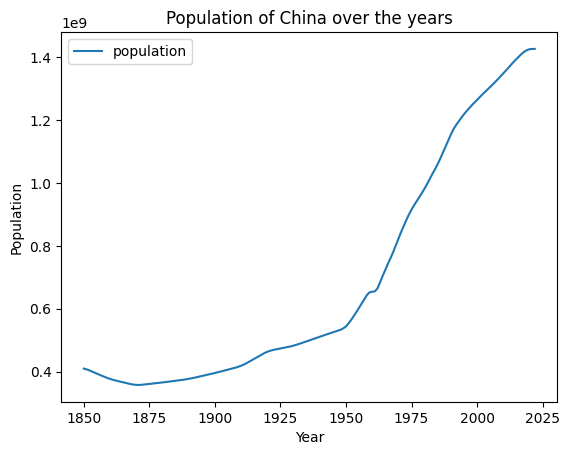

In [163]:
owid.query('country == "China"').groupby('year').sum()[['population']].plot()

plt.xlabel('Year')
plt.ylabel('Population')


plt.title('Population of China over the years')

## top 500 cities

In [59]:
top500cities["co2 (Mt)"] = top500cities["Footprint (Mt CO2)"].apply(lambda x: float(x.split(" &plusmn;")[0]))
top500cities["co2 std (Mt)"] = top500cities["Footprint (Mt CO2)"].apply(lambda x: float(x.split(" &plusmn;")[1]))

top500cities["co2 percap (t)"] = top500cities["Footprint/cap (t CO2)"].apply(lambda x: float(x.split(" &plusmn;")[0]))
top500cities["co2 std percap (t)"] = top500cities["Footprint/cap (t CO2)"].apply(lambda x: float(x.split(" &plusmn;")[1]))



Text(0.5, 1.0, 'Number of Urban Clusters per Country in the top500')

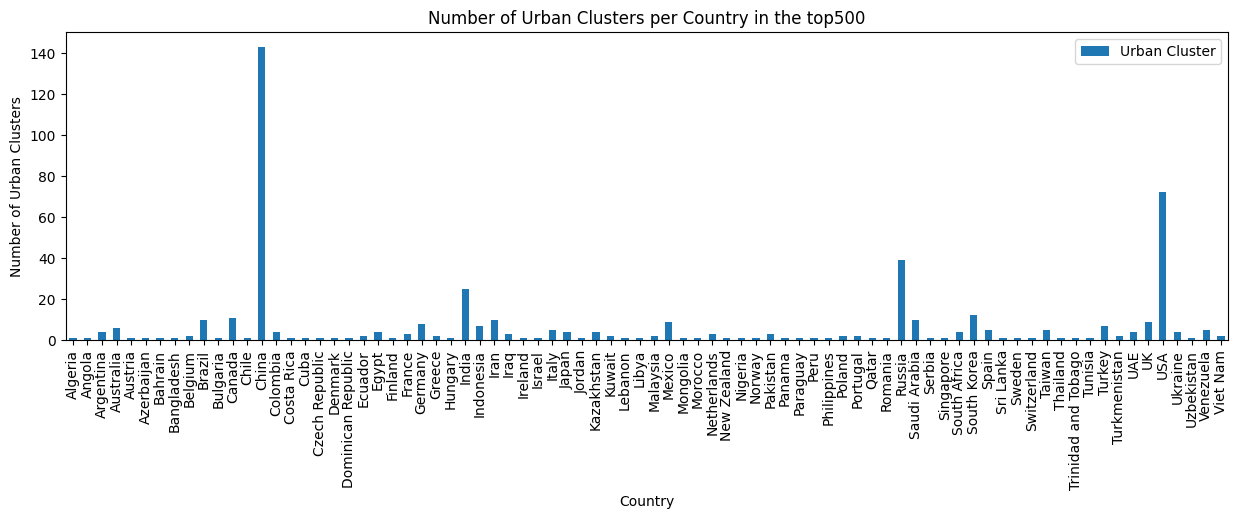

In [162]:
fig, ax = plt.subplots(figsize=(15, 4))

top500cities.groupby('Country').count()[["Urban Cluster"]]

ax = top500cities.groupby('Country').count()[["Urban Cluster"]].plot(kind='bar', ax=ax)

plt.xlabel('Country')
plt.ylabel('Number of Urban Clusters')


plt.title('Number of Urban Clusters per Country in the top500')


In [133]:
df = top500cities.groupby('Country').count()["Urban Cluster"]
df = pd.DataFrame(df)

df["Autre"] = df["Urban Cluster"] >= 10

finalDF = df.query('Autre == True')

In [134]:
#create a new entry for autre with the sum of the other entries
finalDF = pd.concat([finalDF, df.query('Autre == False').sum().to_frame().T])
#rename the index
finalDF.rename(index={0: 'Autre'}, inplace=True)

Text(0.5, 1.0, 'Number of Urban Clusters per Country in the top500')

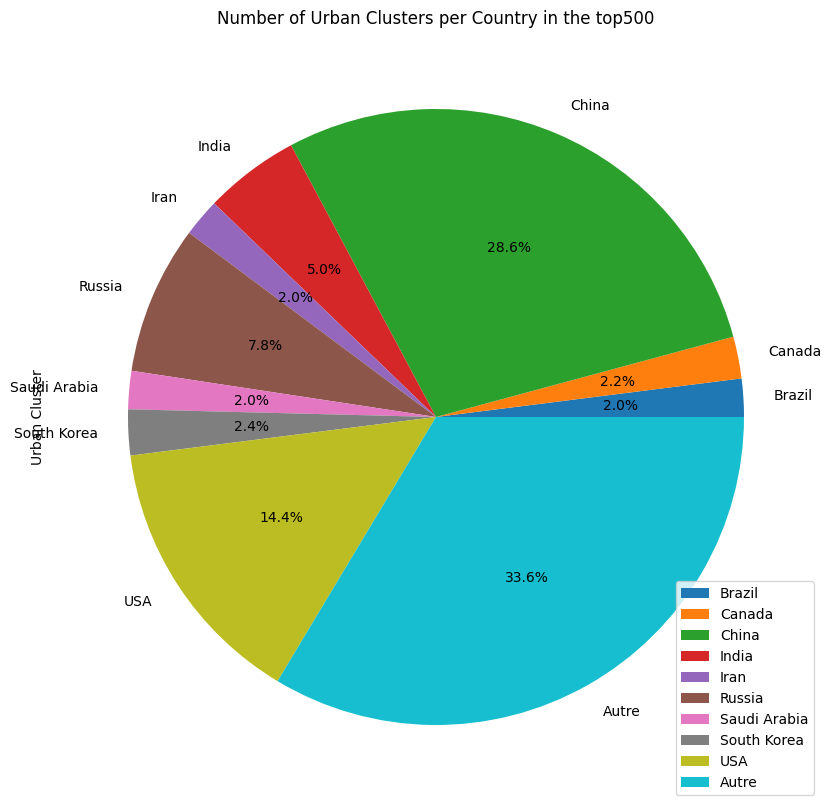

In [141]:
#make a pie chart
fig, ax = plt.subplots(figsize=(10, 10))
finalDF.plot.pie(y='Urban Cluster', ax=ax, autopct='%1.1f%%')

plt.title('Number of Urban Clusters per Country in the top500')

In [170]:
top500cities

,Urban Cluster,Country,Footprint/cap (t CO2),Population,Footprint (Mt CO2),1 StdDev,ClusterID,Global ranking,Domestic ranking,co2,co2 std,co2 (Mt),co2 std (Mt),co2 percap (t),co2 std percap (t)
0,Seoul,South Korea,13.0 &plusmn;2.4,21254000,276.1 &plusmn;51.8,51.8,13127,1,1,276.1,51.8,276.1,51.8,13.0,2.4
1,Guangzhou,China,6.1 &plusmn;1.0,44309000,272.0 &plusmn;46.2,46.2,12827,2,1,272.0,46.2,272.0,46.2,6.1,1.0
2,New York,USA,17.1 &plusmn;5.5,13648000,233.5 &plusmn;75.4,75.4,864,3,1,233.5,75.4,233.5,75.4,17.1,5.5
3,Hong Kong SAR,China,34.6 &plusmn;6.3,6029000,208.5 &plusmn;37.8,37.8,13847,4,1,208.5,37.8,208.5,37.8,34.6,6.3
4,Los Angeles,USA,14.6 &plusmn;3.2,13482000,196.4 &plusmn;43.7,43.7,15,5,2,196.4,43.7,196.4,43.7,14.6,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Kursk,Russia,13.6 &plusmn;7.9,327000,4.4 &plusmn;2.6,2.6,3461,496,39,4.4,2.6,4.4,2.6,13.6,7.9
496,Daqing,China,11.7 &plusmn;6.5,379000,4.4 &plusmn;2.5,2.5,11148,497,142,4.4,2.5,4.4,2.5,11.7,6.5
497,Mendoza,Argentina,5.2 &plusmn;2.4,855000,4.4 &plusmn;2.0,2.0,884,498,4,4.4,2.0,4.4,2.0,5.2,2.4
498,Waterloo,Canada,15.6 &plusmn;9.5,282000,4.4 &plusmn;2.7,2.7,789,499,11,4.4,2.7,4.4,2.7,15.6,9.5


Text(0.5, 1.0, 'CO2 Emission per Urban Cluster in South Korea')

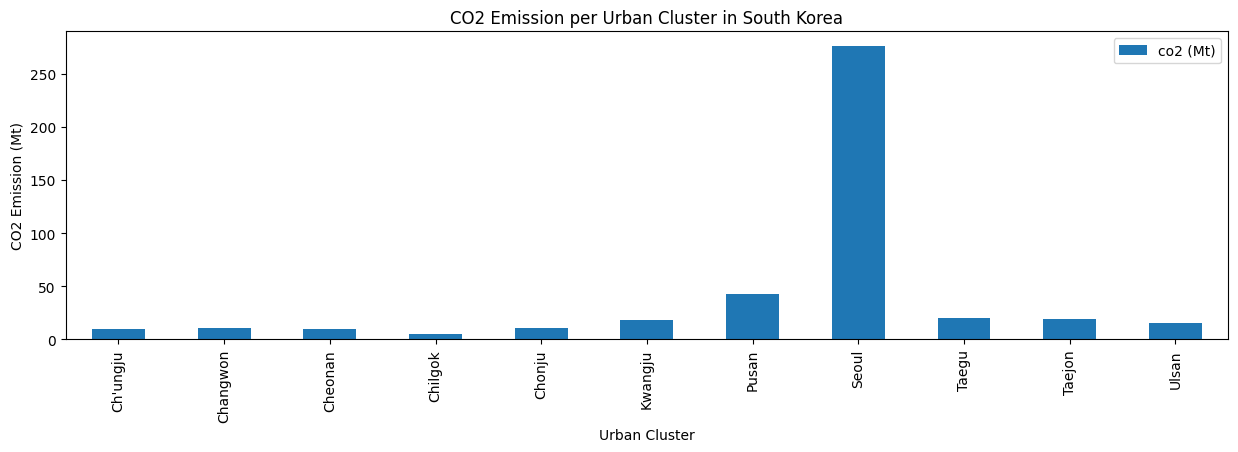

In [175]:
#maje a bar chart for all the cities in South Korea


df = top500cities[top500cities['Country'] == 'South Korea'][['Urban Cluster', 'co2 (Mt)']][:-1]
fig, ax = plt.subplots(figsize=(15, 4))

ax = df.groupby('Urban Cluster').sum().plot(kind='bar', ax=ax)

plt.xlabel('Urban Cluster')
plt.ylabel('CO2 Emission (Mt)')
plt.title('CO2 Emission per Urban Cluster in South Korea')

## IEA

Text(0.5, 1.0, 'Number of projects per type in the IEA database')

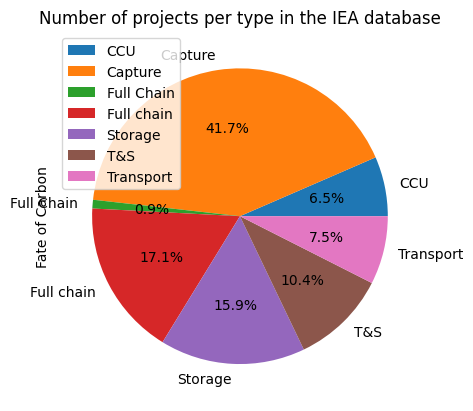

In [150]:
#pie chart

iea.groupby("Type").count()[["Fate of Carbon"]].plot.pie(y='Fate of Carbon', autopct='%1.1f%%')

plt.title('Number of projects per type in the IEA database')

In [155]:
df = iea.groupby("Country").count()[["Fate of Carbon"]]

#regroup all the countries with less than 10 projects in a new entry
df = pd.DataFrame(df)
df["Autre"] = df["Fate of Carbon"] >= 10

finalDF = df.query('Autre == True')

finalDF = pd.concat([finalDF, df.query('Autre == False').sum().to_frame().T])
finalDF.rename(index={0: 'Autre'}, inplace=True)

Text(0, 0.5, '')

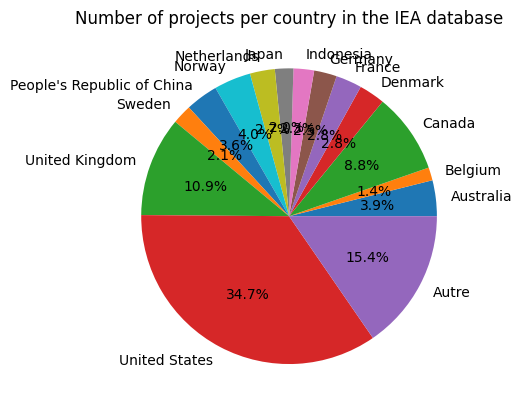

In [161]:
finalDF.plot.pie(y='Fate of Carbon', autopct='%1.1f%%')

plt.title('Number of projects per country in the IEA database')
#remove the legend

plt.legend().remove()

#remove the y label
plt.ylabel('')